In [1]:
import seaborn
import numpy as np
import pandas as pd
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-3770 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442884763.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 214289 observations with 29096 users and 64 items.
PROGRESS:     Data prepared in: 0.106568s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | nmf                            | Use Non-Negative Factors                

In [2]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 214289 observations with 29096 users and 64 items.
PROGRESS:     Data prepared in: 0.111894s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | nmf                            | Use Non-Negative Factors                

In [3]:
vm.testing_rmse(models, training_df)

{'downhill': 0.62627681623738096,
 'total': 0.94403699895470972,
 'uphill': 0.26043650650692124}

In [4]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,-0.501986,-0.733044,0.388591
seg_distance,0.040591,0.169809,0.540288
seg_maximum_grade,-0.214336,-0.166677,-0.289767
total_rating,1.000000,0.921196,0.933511
uphill_rating,0.921196,1.000000,NaN
downhill_rating,0.933511,NaN,1.000000


In [21]:
lb = r.Leaderboards(training_df[['athlete_id', 'segment_id', 'seg_average_grade', 'average_speed']])
lb.store('athlete', athlete_ratings, board_size=1000)

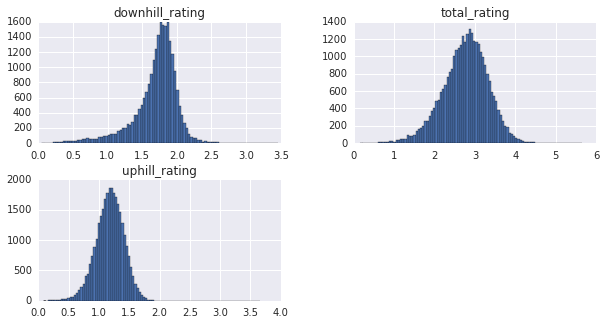

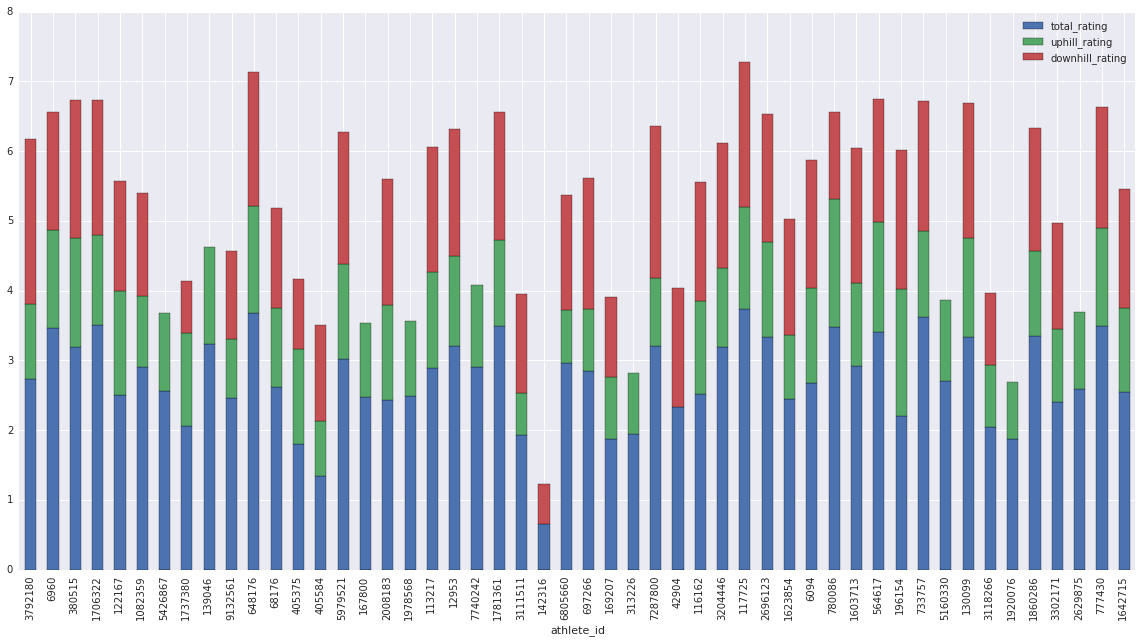

In [6]:
vm.plot_ratings(athlete_ratings)

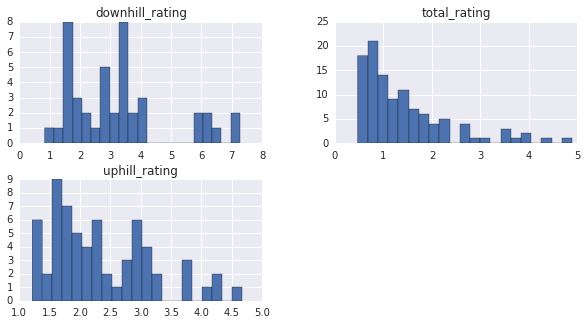

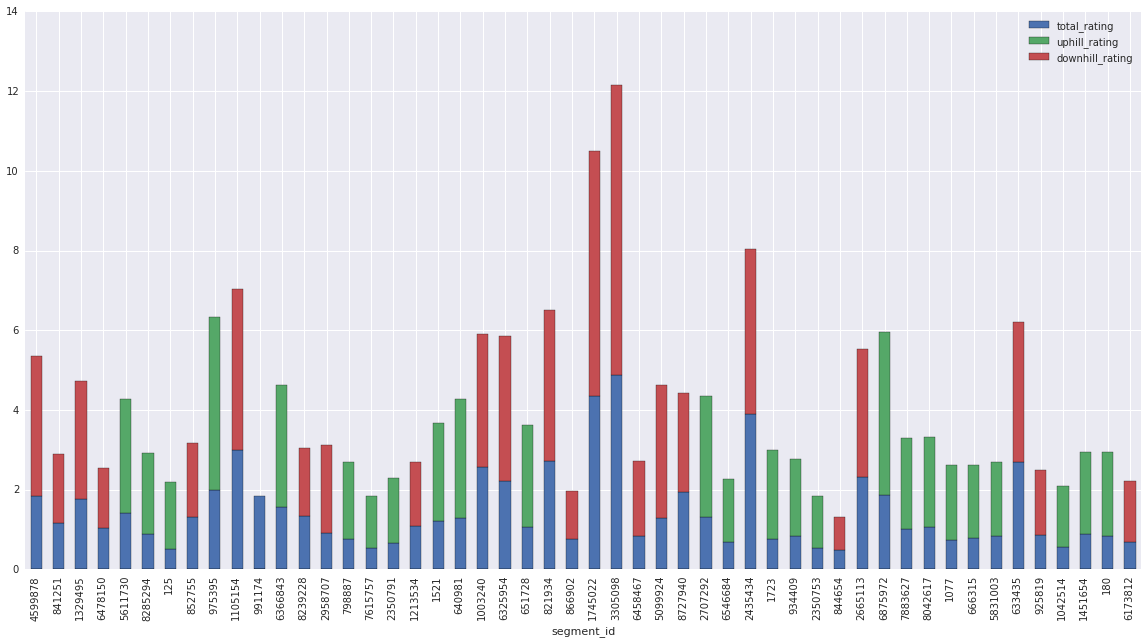

In [7]:
vm.plot_ratings(segment_ratings)

In [8]:
segment_ratings.uphill_rating.idxmin()

8594904

In [9]:
segment_ratings.min()

total_rating       0.468405
uphill_rating      1.209316
downhill_rating    0.828967
dtype: float64

In [10]:
athlete_ratings.ix[6637281]

total_rating       2.461801
uphill_rating      1.175537
downhill_rating    1.554113
Name: 6637281, dtype: float64

In [11]:
(segment_ratings.uphill_rating > -.28).mean()

0.58715596330275233

In [12]:
print(segment_ratings.ix[975395])
print(segment_ratings.ix[651728])
print((segment_ratings.uphill_rating>4.88).mean())
print((segment_ratings.total_rating>-0.42).mean())

total_rating       1.998827
uphill_rating      4.328964
downhill_rating         NaN
Name: 975395, dtype: float64
total_rating       1.067302
uphill_rating      2.558530
downhill_rating         NaN
Name: 651728, dtype: float64
0.0
1.0


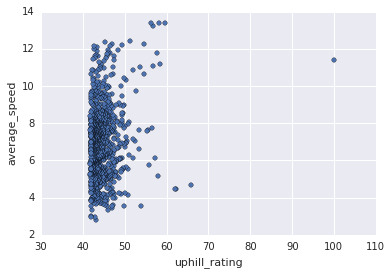

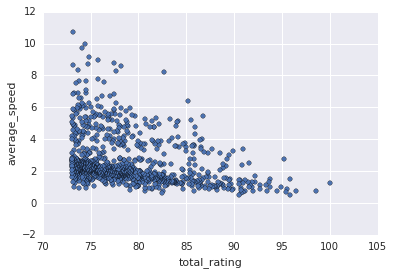

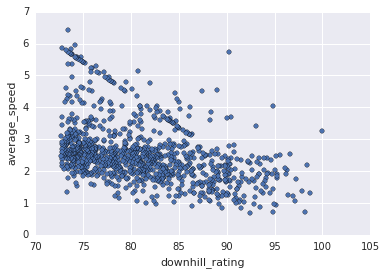

In [22]:
for rating in ['uphill_rating', 'total_rating', 'downhill_rating']:
    pd.merge(athlete_boards[rating].reset_index(), training_df.groupby('athlete_id').average_speed.mean().reset_index(), on='athlete_id').plot(kind='scatter', x=rating, y='average_speed')
    


In [14]:
df.query('athlete_id == 979905')

,average_watts,device_watts,distance,elapsed_time,moving_time,athlete_id,segment_id,activity_id,seg_average_grade,seg_distance,seg_elevation_low,seg_elevation_high,seg_maximum_grade,date,tracks_cadence,tracks_heartrate,dist_diff,average_speed
359533,95.0,False,2923.2,273,273,979905,4173351,286581459,-5.6,3074.30,-0.2,172.2,0.0,2015-04-11 13:29:14,False,False,151.10,10.707692
613234,48.9,False,1499.5,120,120,979905,3305098,286581459,-8.7,1454.51,7.5,134.9,0.1,2015-04-11 13:20:29,False,False,-44.99,12.495833
1319399,320.3,False,2437.9,220,220,979905,5642079,286581459,5.0,2417.70,63.6,185.4,19.1,2015-04-11 13:24:37,False,False,-20.20,11.081364


In [15]:
df.query('segment_id == 5642079').average_speed.mean()

4.146791111813005